In [1]:
# Run this cell to set up your notebook

import numpy as np
from scipy import stats
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Week 8 Part 1 #

## Background ##
We are trying to quantify chance variation. In particular, we are trying to measure the rough size of deviations around the mean. The main measure is SD. 

Variance (and hence SD) can be a pain to find directly from the definition. So we need to develop properties that will help us calculate it. 

The crucial property for finding expectation is additivity. So:

## Main Goal of Chapter 13 ##
To develop rules for variances of sums, and study the fundamental examples.

## Important Observation ##
Always start by experimenting with a simple example.

Let $I_1$ and $I_2$ be indicators of heads on the first two tosses of a coin. Now consider:

- $S = I_1 + I_2$, so $E(S) = 0.5 + 0.5 = 1$.
- $T = I_1 + I_1 = 2I_1$, so $E(T) = 2(0.5) = 1$.

The expectations are the same. But $S$ is the number of heads in two tosses, so it's binomial $(2, 0.5)$, whereas $T$ is uniform on 0 and 2.

In [2]:
k = [0, 1, 2]
dist_S = Table().values(k).probabilities([0.25, 0.5, 0.25])
dist_T = Table().values(k).probabilities([0.5, 0, 0.5])

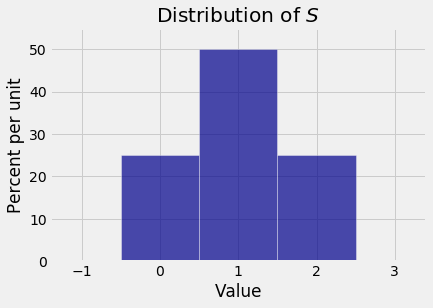

In [3]:
Plot(dist_S)
plt.title('Distribution of $S$');

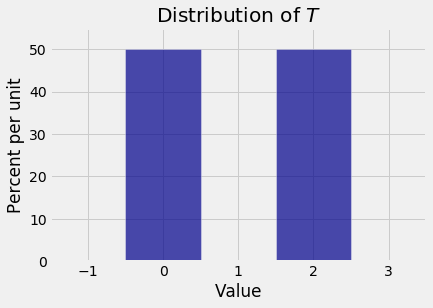

In [4]:
Plot(dist_T)
plt.xlim(-1.5, 3.5)
plt.title('Distribution of $T$');

Same expectation, clearly different SDs. The difference must come from adding two *independent* random variables ($S = I_1 + I_2$) versus adding two *dependent* random variables ($T = I_1 + I_1$).

## Reading 1: Introducing Covariance ##
You now have the motivation for examining the variance of a sum.

Get your notebook and pencil, and work through the [Intro to Chapter 13](http://prob140.org/textbook/Chapter_13/00_Variance_Via_Covariance.html).

### Connection to Homework ###
Once you have done the reading, you will recognize $Cov(X, Y)$ from your homework.

- In homework you showed that covariance is used to find correlation.
- **The other main use of covariance is to find variances of sums.** That's the focus of this week.

$$
Var(X+Y) ~ = ~ Var(X) + Var(Y) + 2Cov(X, Y)
$$

Notice the parallel with $(a+b)^2 = a^2 + b^2 + 2ab$. Variance and covariance share many properties with squares and products.

**Properties of covariance are very helpful in simplifying calculation.** Let's start developing them.

## Reading 2: Basic Properties ##
Here is a list of useful properties of covariance. The proofs are routine, and I always ask students to work through them on their own. Keep the [definition of covariance](http://prob140.org/textbook/Chapter_13/01_Properties_of_Covariance.html#Properties-of-Covariance) in front of you.

- [Covariance and Constants](http://prob140.org/textbook/Chapter_13/01_Properties_of_Covariance.html#Properties-of-Covariance)
- [Variance is a Special Case](http://prob140.org/textbook/Chapter_13/01_Properties_of_Covariance.html#Variance-is-a-Covariance)
- [Symmetry in $X$ and $Y$](http://prob140.org/textbook/Chapter_13/01_Properties_of_Covariance.html#Covariance-is-Symmetric)
- [Using the Expected Product](http://prob140.org/textbook/Chapter_13/01_Properties_of_Covariance.html#Covariance-is-Symmetric): This is typically a really bad way to try to find covariance, as expected products can be nasty. But it is useful in very simple cases, e.g. to find the covariance of two indicators. That's coming up later.

Now skip a bit in the text, as I would have done in class. Jump to:

- [Independence](http://prob140.org/textbook/Chapter_13/01_Properties_of_Covariance.html#Independent-Implies-Uncorrelated). This involves a calculation of $E(XY)$ via the joint distribution table: go to each cell of the table, find the value of $xy$, weight that by $P(X=x, Y=y)$, and add.

The result is that **if $X$ and $Y$ are independent** then $E(XY) = E(X)E(Y)$. In general, the expectation of a product is not equal to the product of the expectations, just as the expectation of a square is not equal to the square of the expectation.

Recall from homework that the correlation $r(X, Y) = \frac{Cov(X, Y)}{SD(X)SD(Y)}$. 

So $r(X,Y) = 0 \iff Cov(X,Y) = 0$. That is why $X$ and $Y$ are called *uncorrelated* if $Cov(X,Y) = 0$.

You now know that independent random variables are uncorrelated.

### However ... Subtle Issue ###
Uncorrelated random variables need not be independent.

For example, let $(X, Y)$ be a point picked at random from $(-1, 0)$, $(0, 1)$, and $(1, 0)$. 

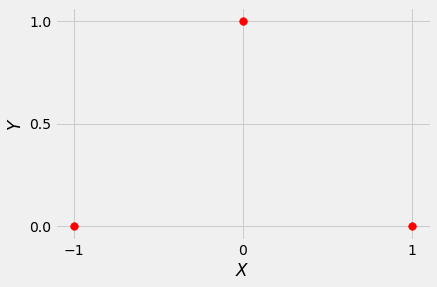

In [5]:
x = [-1, 0, 1]
y = [0, 1, 0]
plt.scatter(x, y, color='r', s=60)
plt.xticks([-1, 0, 1])
plt.yticks([0, 0.5, 1])
plt.xlabel('$X$')
plt.ylabel('$Y$');

This is simple enough that it is possible to use $Cov(X,Y) = E(XY) - E(X)E(Y)$.

- $XY = 0$ with probability $1$, so $E(XY) = 0$.
- $X$ is uniform on $\{-1, 0, 1\}$, so $E(X) = 0$.
- So $Cov(X, Y) = 0$ or in other words $X$ and $Y$ are uncorrelated.

But $X$ and $Y$ are clearly dependent. For example, if you know that $Y = 1$ then you know for sure that $X = 0$.

This is a mathematical reinforcement of what you've known since Data 8: 

Correlation only measures *linear* association. Two variables can have a strong non-linear association (like $X$ and $Y$ in the example above) and still be uncorrelated.

## Quick Check, a.k.a. Vitamin ##

Say whether each of these statements is true or false. If you've done the work above, it should be straightforward. If you find yourself unsure of an answer, please go back and search for it.

**1.** The variance of sum can be affected by whether or not the variables being added are independent.

**2.** The expectation of a sum can be affected by whether or not the variables being added are independent.

**3.** $E(XY) = E(X)E(Y)$ for all $X$, $Y$.

**4.** Variance is also a covariance.

## Take a break. Major property coming up next. ##